# Page View Time Series Visualizer 
## Course Project: Data Analysis with Python Certification (*freeCodeCamp*)

In [17]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.) 
df = pd.read_csv("fcc-forum-pageviews.csv", index_col = 0)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [18]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
- The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019
- The label on the x axis should be Date
- the label on the y axis should be Page Views.

In [19]:
def draw_line_plot():
    #reset index and create new datetime column
    df2 = df.reset_index()
    df2['date'] = pd.to_datetime(df2['date'].str.strip(), format='%Y/%m/%d')
    #define plot size
    fig, ax = plt.subplots(figsize=(15, 7))
    #plot data
    ax.plot(df2['date'],df2['value'], color = "firebrick")
    # set axis labels & titles
    ax.set(xlabel="Date", ylabel="Page Views",
           title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    # Define the date format
    date_form = DateFormatter("%Y-%m")
    ax.xaxis.set_major_formatter(date_form)
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')

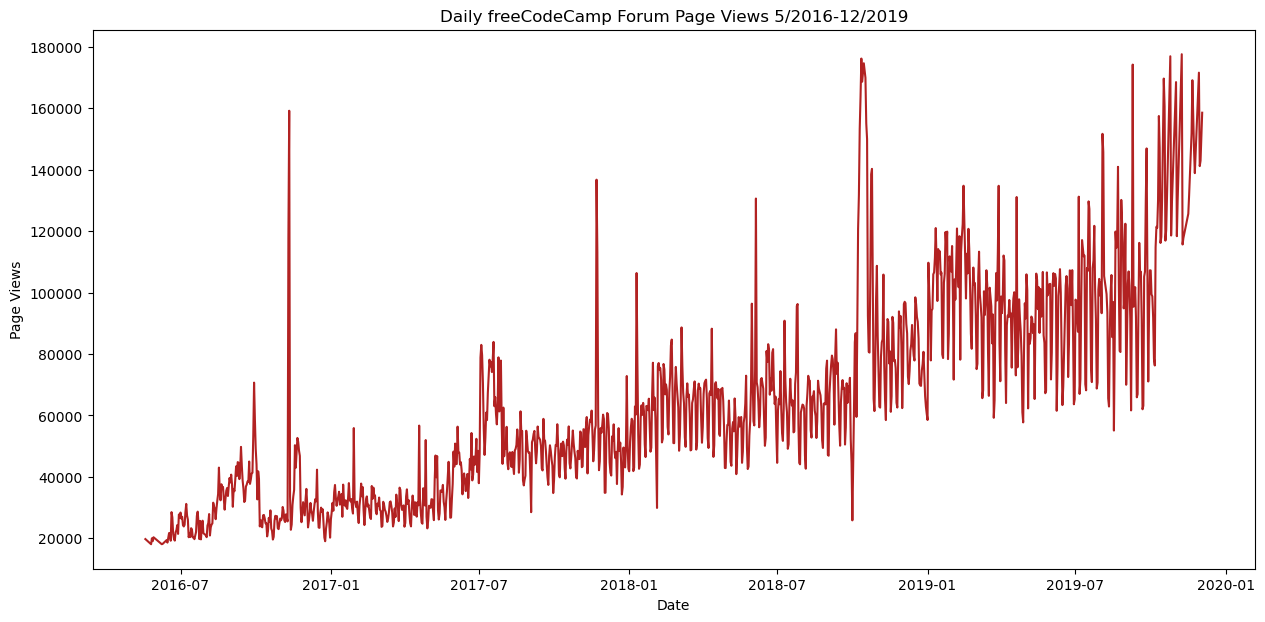

In [20]:
#call function
draw_line_plot()

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
- It should show average daily page views for each month grouped by year. 
- The legend should show month labels and have a title of Months. 
- the label on the x axis should be Years 
- the label on the y axis should be Average Page Views.

In [21]:
def draw_bar_plot():
    # Prepare data for box plots
    df_bar = df.reset_index().copy()
    df_bar['date'] = pd.to_datetime(df_bar['date'].str.strip(), format='%Y/%m/%d')
    df_bar['year'] = df_bar['date'].dt.year
    df_bar['month'] = df_bar['date'].dt.month
    months = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December" }
    df_bar['Months'] = [months[x] for x in df_bar['month']]
    df_bar = df_bar.groupby(['year','month','Months'], as_index=False).mean().sort_values(by = 'month')

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.barplot(x="year",
           y="value",
           hue="Months",
           data=df_bar)
    plt.xlabel('Years')
    plt.ylabel('Average Page Views') 
    plt.legend(loc = "upper left", title = "Months")
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')

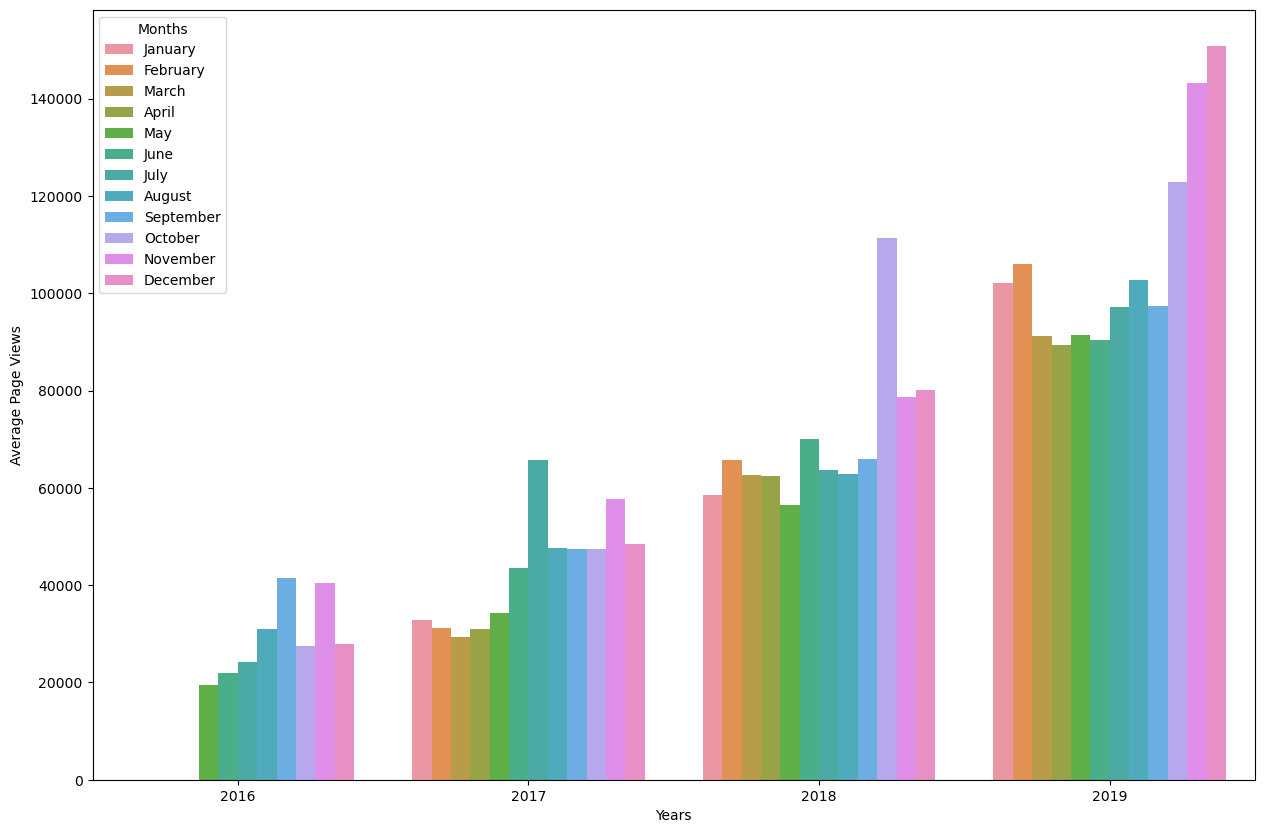

In [22]:
#call function
draw_bar_plot()

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. 
- The title of the first chart should be Year-wise Box Plot (Trend) 
- the title of the second chart should be Month-wise Box Plot (Seasonality)
- Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [23]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.reset_index().copy()
    df_box['date'] = pd.to_datetime(df_box['date'].str.strip(), format='%Y/%m/%d')
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.month
    months = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec" }
    df_box['Months'] = [months[x] for x in df_box['month']]


    # Draw box plots (using Seaborn)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (40,15))
    sns.boxplot(x="year",
                y="value",
                data=df_box, ax = ax1)
    sns.boxplot(x="Months",
            y="value",
            order = ("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"),
            data=df_box, ax = ax2)

    ax1.set_title('Year-wise Box Plot (Trend)')
    ax2.set_title('Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    f.savefig('box_plot.png')

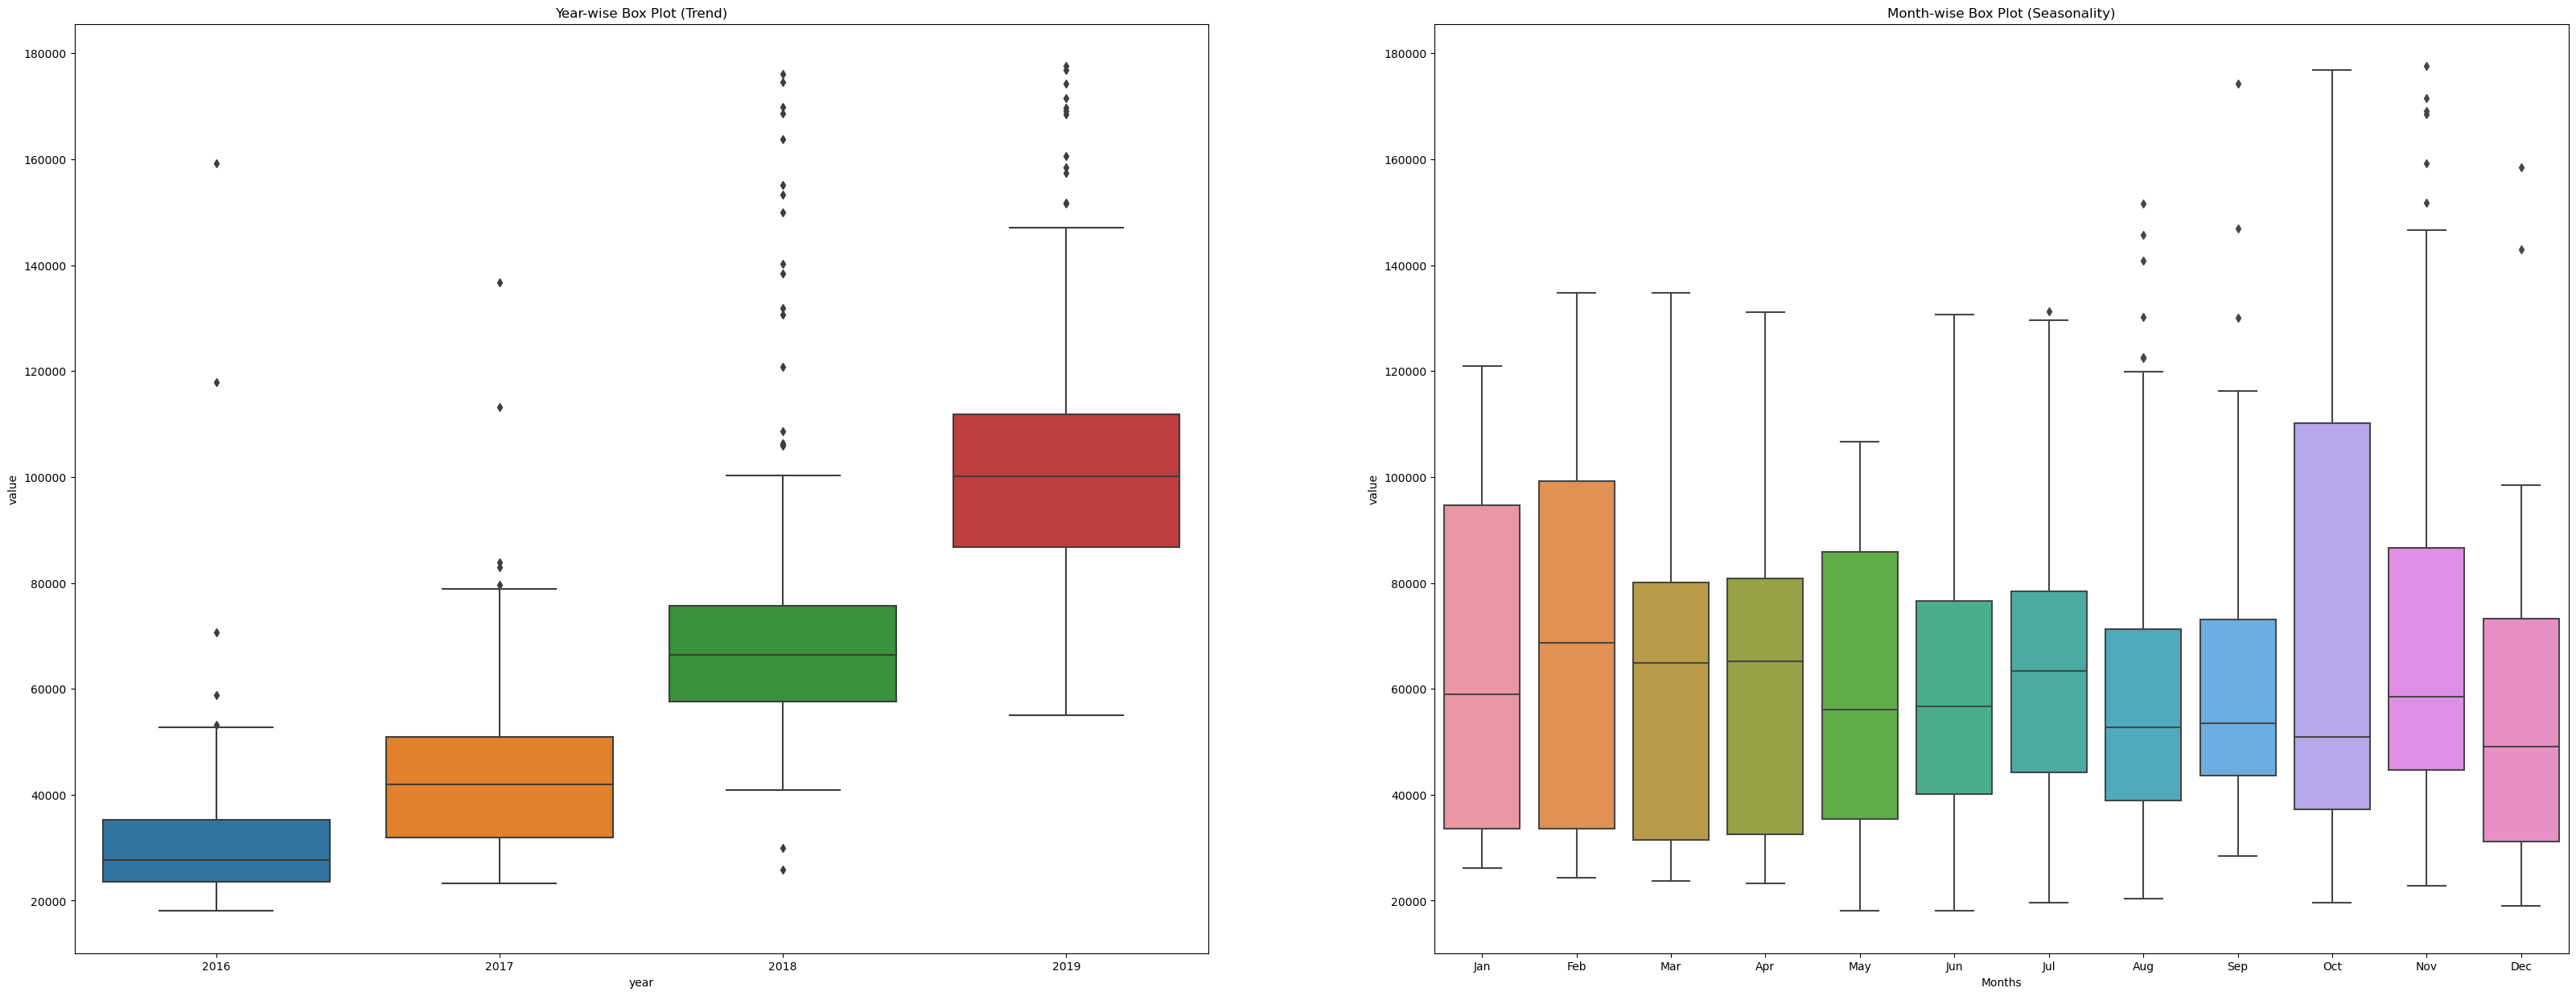

In [24]:
#call function
draw_box_plot()